Repaso de outlier

Rango intercuartil = Q3 - Q1


Outlier (superior) DATO > Q3 + 1.5IQR

Outlier (inferior) Dato < Q1 - 1.5IQR

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Análisis exploratorio
# Numpy es una libreria que me permite manejar vectores, matrices y tensores de forma eficiente

In [107]:
stroke_df = pd.read_csv('../datasets/stroke.csv')

In [19]:
stroke_df.sample(5) 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3639,61475,Female,51.00,1,0,Yes,Private,Rural,85.84,31.8,never smoked,0
5095,68598,Male,1.08,0,0,No,children,Rural,79.15,17.4,Unknown,0
1715,35143,Female,35.00,0,0,Yes,Private,Urban,86.87,43.2,Unknown,0
4340,44662,Female,45.00,0,0,Yes,Govt_job,Rural,95.24,40.2,Unknown,0
1299,33526,Female,51.00,0,0,Yes,Self-employed,Rural,91.63,35.3,Unknown,0


In [20]:
# features (columnas que van a alimentar a mi modelo de machine learning)
# target value (stroke)

### Tipos de datos

Es importante entender el tipo de datos de nuestras variables ya que eso impacta finalmente en la decisión de que gráficos llevar adelante.

In [22]:
stroke_df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [24]:
stroke_df.shape

(5110, 12)

In [28]:
print("El dataset de strokes tiene", stroke_df.shape[0], "de filas y tiene", stroke_df.shape[1], " columnas")

El dataset de strokes tiene 5110 de filas y tiene 12  columnas


In [29]:
stroke_df.sample()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1696,19239,Female,50.0,0,0,Yes,Govt_job,Urban,104.24,32.8,Unknown,0


### Hipótesis

- Los casados tienen más probabilidad de sufrir un stroke
- Las personas con hiperstensión y fumadores tienen mayor probabilidad de sufrir un acv
- La edad es un factor de riesgo para acv

## Clases desbalanceadas

Se considera que una clase está desbalanceada si tiene +- 15% de datos respecto a otra clase

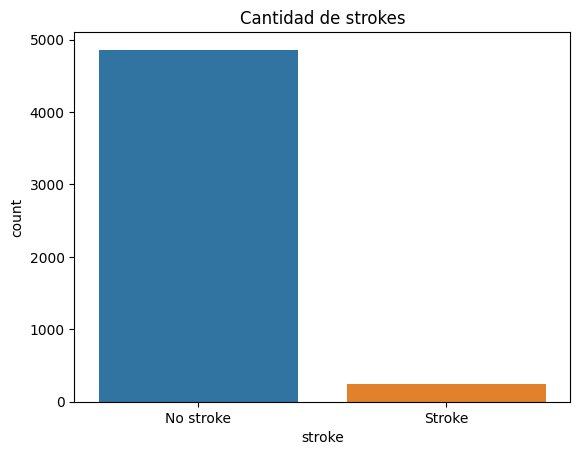

In [34]:
sns.countplot(data=stroke_df, x='stroke')
plt.xticks([0,1], ["No stroke", "Stroke"])
plt.title("Cantidad de strokes")
plt.show()

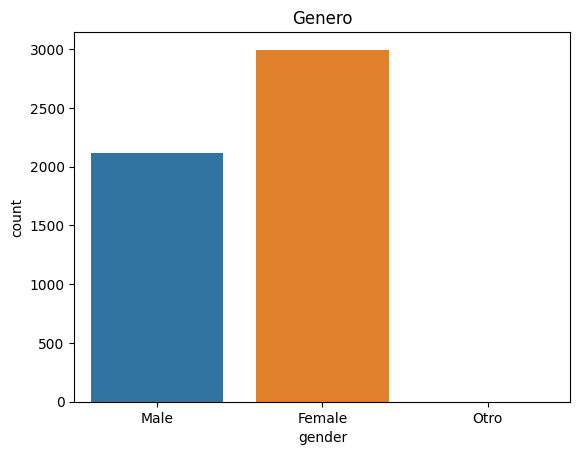

In [38]:
sns.countplot(data=stroke_df, x='gender')
plt.xticks([0,1,2], ["Male", "Female","Otro"])
plt.title("Genero")
plt.show()

### Trabajamos sobre valores nulos en nuestro Dataset

In [42]:
print("Valores nulos en nuestros features", stroke_df.isna().sum())

Valores nulos en nuestros features id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


> Tenemos 201 valores nulos sobre el feature BMI (Indice de masa corporal)

Técnicas de reemplazo:

- Reemplazar por la media
- Reemplazar por la mediana
- Reemplazar por IQR 

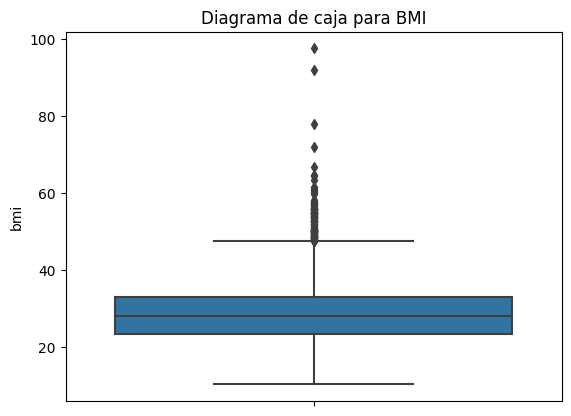

In [100]:
sns.boxplot(data=stroke_df, y = 'bmi')
plt.title("Diagrama de caja para BMI")
plt.show()

In [59]:
# sns.histplot(data=stroke_df, x='bmi', kde=True)

Al detectar muchos valores atípicos decidimos reemplazar estos nulos por alguna medida que sea robusta. Por ejemplo, la mediana

In [101]:
bmiMedian = stroke_df['bmi'].median()
stroke_df['bmi'].fillna(bmiMedian, inplace=True)

In [64]:
stroke_df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Medidas de tendencia central , de posición y de dispersión

In [65]:
stroke_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Medidas de dispersión

- Varianza
- Desvío estándar
- Desviación media

En lineas generales, las medidas de dispersión mide el grado de dispersión de una V.A respecto a la 

Respecto de la edad [años]

La media es de 43,226 años y el desvío estándar (std) es de 22.61 años
La media es de 43,226 años y la varianza (std) es de 484 años^2

Std = $ \sqrt(Var(x)) $

Variables continuas -> diagramas de caja e histogramas

- bmi
- age
- glucose

<AxesSubplot: xlabel='age', ylabel='Count'>

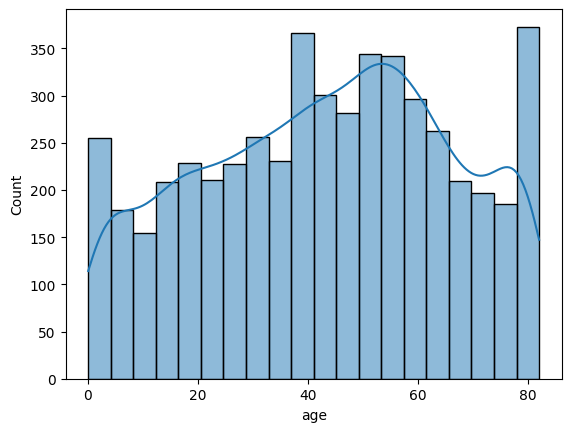

In [69]:

sns.histplot(data=stroke_df,x='age', kde=True)

<AxesSubplot: ylabel='age'>

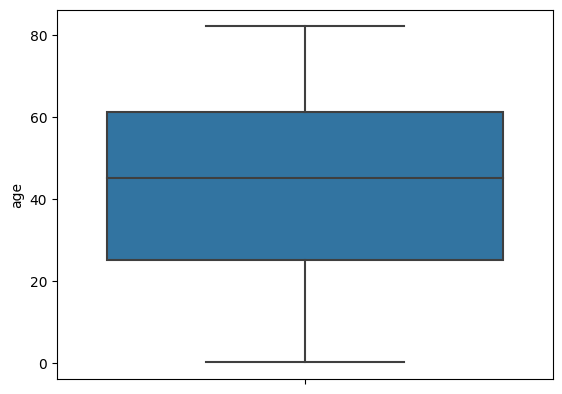

In [71]:
sns.boxplot(data=stroke_df,y='age')

<AxesSubplot: ylabel='avg_glucose_level'>

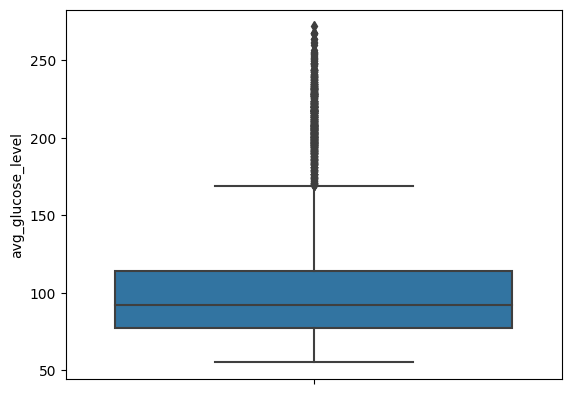

In [74]:
# Glucosa
sns.boxplot(data=stroke_df,y='avg_glucose_level')

<AxesSubplot: xlabel='avg_glucose_level', ylabel='Count'>

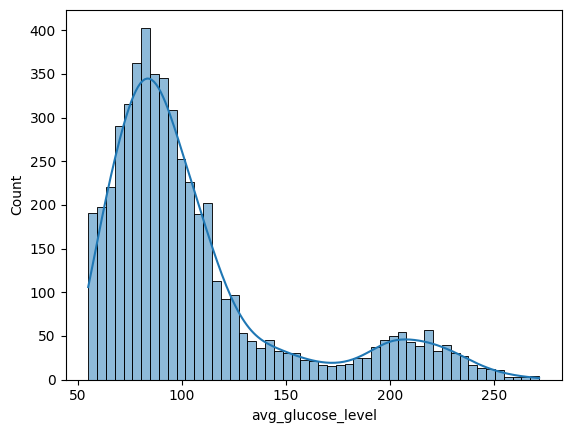

In [78]:
sns.histplot(data=stroke_df,x='avg_glucose_level', kde=True)

### Variables categóricas / discretas

Diagramas de barras / diagramas de torta / countplot

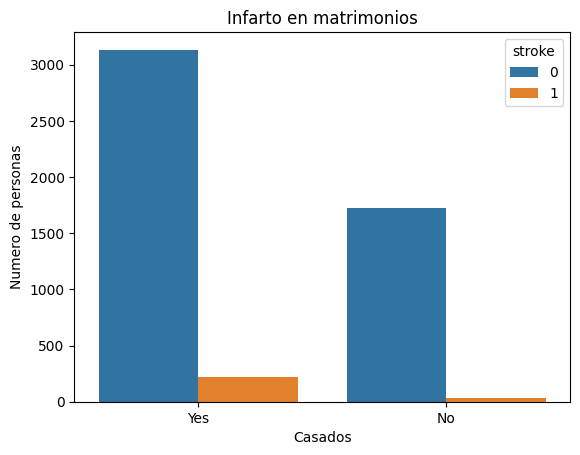

In [81]:
sns.countplot(data=stroke_df,x='ever_married', hue='stroke')
plt.xlabel("Casados")
plt.ylabel("Numero de personas")
plt.title("Infarto en matrimonios")
plt.show()

## Covarianza y correlación

Comprender la relación entre 2 variables continuas. La covarianza indica si ambas variables varian en la misma dirección (covarianza positiva) o en direccion opuesta

No importa el valor de la covarianza importa el signo

Correlación explica el cambio de una variable (proporción). Este varia entre [-1;1] Siendo 1 que las variables están perfectamente correlacionadas, 0 que no hay correlación alguna y -1 que están correlacionadas negativamente


## Matriz de correlación



In [84]:
# Eliminar la columna id
stroke_df.drop(columns=['id'],inplace=True) # eliminar la columna id del dataframe

In [96]:
stroke_df.corr()
# df.corr() could not convert string to float -> df.corr(numeric_only=True)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.324296,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.158293,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.036916,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.166876,0.131945
bmi,0.324296,0.158293,0.036916,0.166876,1.000000,0.036110
stroke,0.245257,0.127904,0.134914,0.131945,0.036110,1.000000


<AxesSubplot: >

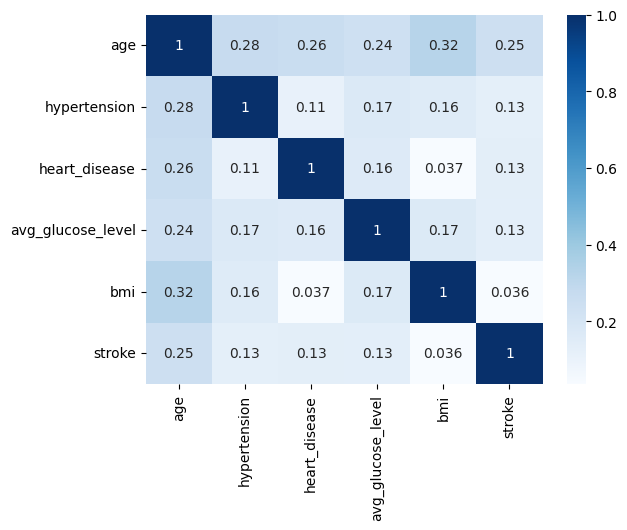

In [90]:
sns.heatmap(stroke_df.corr(), annot=True, cmap='Blues')

In [92]:
stroke_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Debemos pasar todos los features de tipo "object" ( categóricas ) a features numericos para poder evaluar la relación contra nuestra target value (stroke)

- get_dummies (más simple de implementar y viene por defecto en pandas)
- OneHotEncoding
- LabelEncoding

In [106]:
set(stroke_df['work_type'])

{'Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children'}

In [ ]:
[0,0,0,0]

In [113]:
# Del dataframe stroke_df convierte a valores discretos los elementos de la columna ever_married
# stroke_df = pd.get_dummies(stroke_df, columns=['ever_married','work_type','smoking_status'], drop_first=True)
stroke_df = pd.get_dummies(stroke_df, columns=['ever_married'], drop_first=True)

KeyError: "None of [Index(['ever_married'], dtype='object')] are in the [columns]"

In [111]:
stroke_df

,id,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,ever_married_Yes
0,9046,Male,67.0,0,1,Private,Urban,228.69,36.6,formerly smoked,1,1
1,51676,Female,61.0,0,0,Self-employed,Rural,202.21,NaN,never smoked,1,1
2,31112,Male,80.0,0,1,Private,Rural,105.92,32.5,never smoked,1,1
3,60182,Female,49.0,0,0,Private,Urban,171.23,34.4,smokes,1,1
4,1665,Female,79.0,1,0,Self-employed,Rural,174.12,24.0,never smoked,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Private,Urban,83.75,NaN,never smoked,0,1
5106,44873,Female,81.0,0,0,Self-employed,Urban,125.20,40.0,never smoked,0,1
5107,19723,Female,35.0,0,0,Self-employed,Rural,82.99,30.6,never smoked,0,1
5108,37544,Male,51.0,0,0,Private,Rural,166.29,25.6,formerly smoked,0,1


<AxesSubplot: >

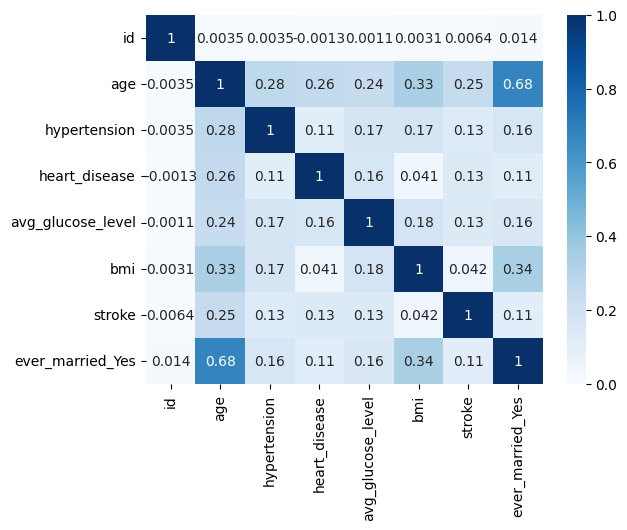

In [114]:
sns.heatmap(stroke_df.corr(), annot=True, cmap='Blues')

In [116]:
stroke_df = pd.get_dummies(stroke_df, columns=['smoking_status'], drop_first=True)

KeyError: "None of [Index(['smoking_status'], dtype='object')] are in the [columns]"

<AxesSubplot: >

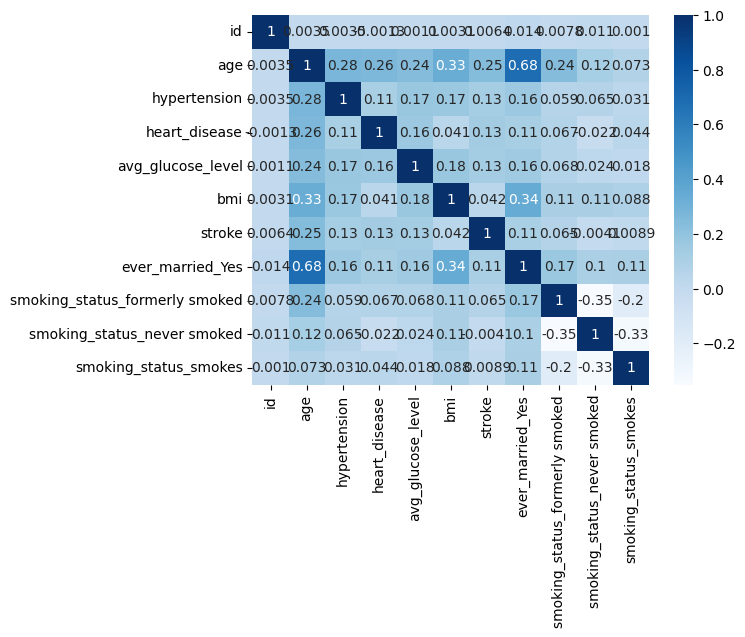

In [118]:
sns.heatmap(stroke_df.corr(), annot=True, cmap='Blues')

<AxesSubplot: ylabel='bmi'>

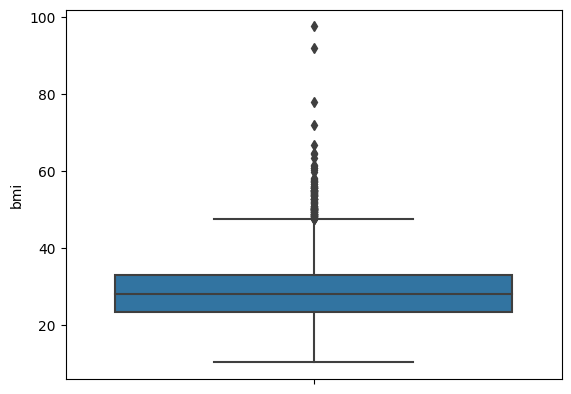

In [121]:
sns.boxplot(data=stroke_df,y='bmi')

## Outliers

Valores atípicos

Rango intercuartil = Q3 - Q1


Umbral superior = DATO > Q3 + 1.5IQR

Umbral inferior =  Dato < Q1 - 1.5IQR

In [125]:
Q1 = stroke_df['bmi'].quantile(0.25) # percentil 25
Q3 = stroke_df['bmi'].quantile(0.75)
iqr = Q3 - Q1

In [126]:
umbral_superior = Q3 + 1.5 * iqr
umbral_inferior = Q1 - 1.5 * iqr

In [131]:
print("Un valor de BMI por debajo de : ",umbral_inferior, " es un outlier")
print("Un valor de BMI por arriba de : ",umbral_superior, " es un outlier")

Un valor de BMI por debajo de :  9.099999999999998  es un outlier
Un valor de BMI por arriba de :  47.5  es un outlier


In [134]:
# Agarrar de la columna bmi los valores mayores a mi umbral superior o los menores a mi umbral inferior
outliers = stroke_df[(stroke_df['bmi'] > umbral_superior) | (stroke_df['bmi'] < umbral_inferior)]

In [142]:
print("Cantidad de outliers en BMI",len(outliers))

Cantidad de outliers en BMI 110


In [150]:
outliers

,id,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,stroke,ever_married_Yes,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
21,13861,Female,52.0,1,0,Self-employed,Urban,233.29,48.9,1,1,0,1,0
113,41069,Female,45.0,0,0,Private,Rural,224.10,56.6,1,1,0,1,0
254,32257,Female,47.0,0,0,Private,Urban,210.95,50.1,0,1,0,0,0
258,28674,Female,74.0,1,0,Self-employed,Urban,205.84,54.6,0,1,0,1,0
270,72911,Female,57.0,1,0,Private,Rural,129.54,60.9,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4858,1696,Female,43.0,0,0,Private,Urban,100.88,47.6,0,1,0,0,1
4906,72696,Female,53.0,0,0,Private,Urban,70.51,54.1,0,1,0,1,0
4952,16245,Male,51.0,1,0,Self-employed,Rural,211.83,56.6,0,1,0,1,0
5009,40732,Female,50.0,0,0,Self-employed,Rural,126.85,49.5,0,1,1,0,0


In [153]:
stroke_df.index

RangeIndex(start=0, stop=5110, step=1)

In [154]:
outliers.index

Int64Index([  21,  113,  254,  258,  270,  333,  341,  358,  430,  462,
            ...
            4650, 4704, 4779, 4838, 4847, 4858, 4906, 4952, 5009, 5057],
           dtype='int64', length=110)

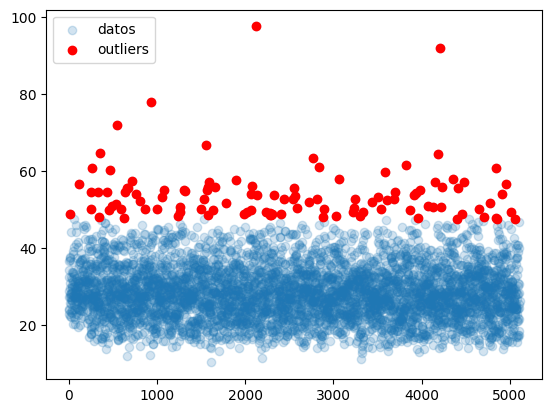

In [156]:
# df.index es el valor en x
plt.scatter(stroke_df.index,stroke_df['bmi'], label='datos', alpha=0.2)
plt.scatter(outliers.index,outliers['bmi'], color='red', label='outliers')
plt.legend()